# NLP on Batman: Arkham Asylum Reviews
-----------
## Data Extraction

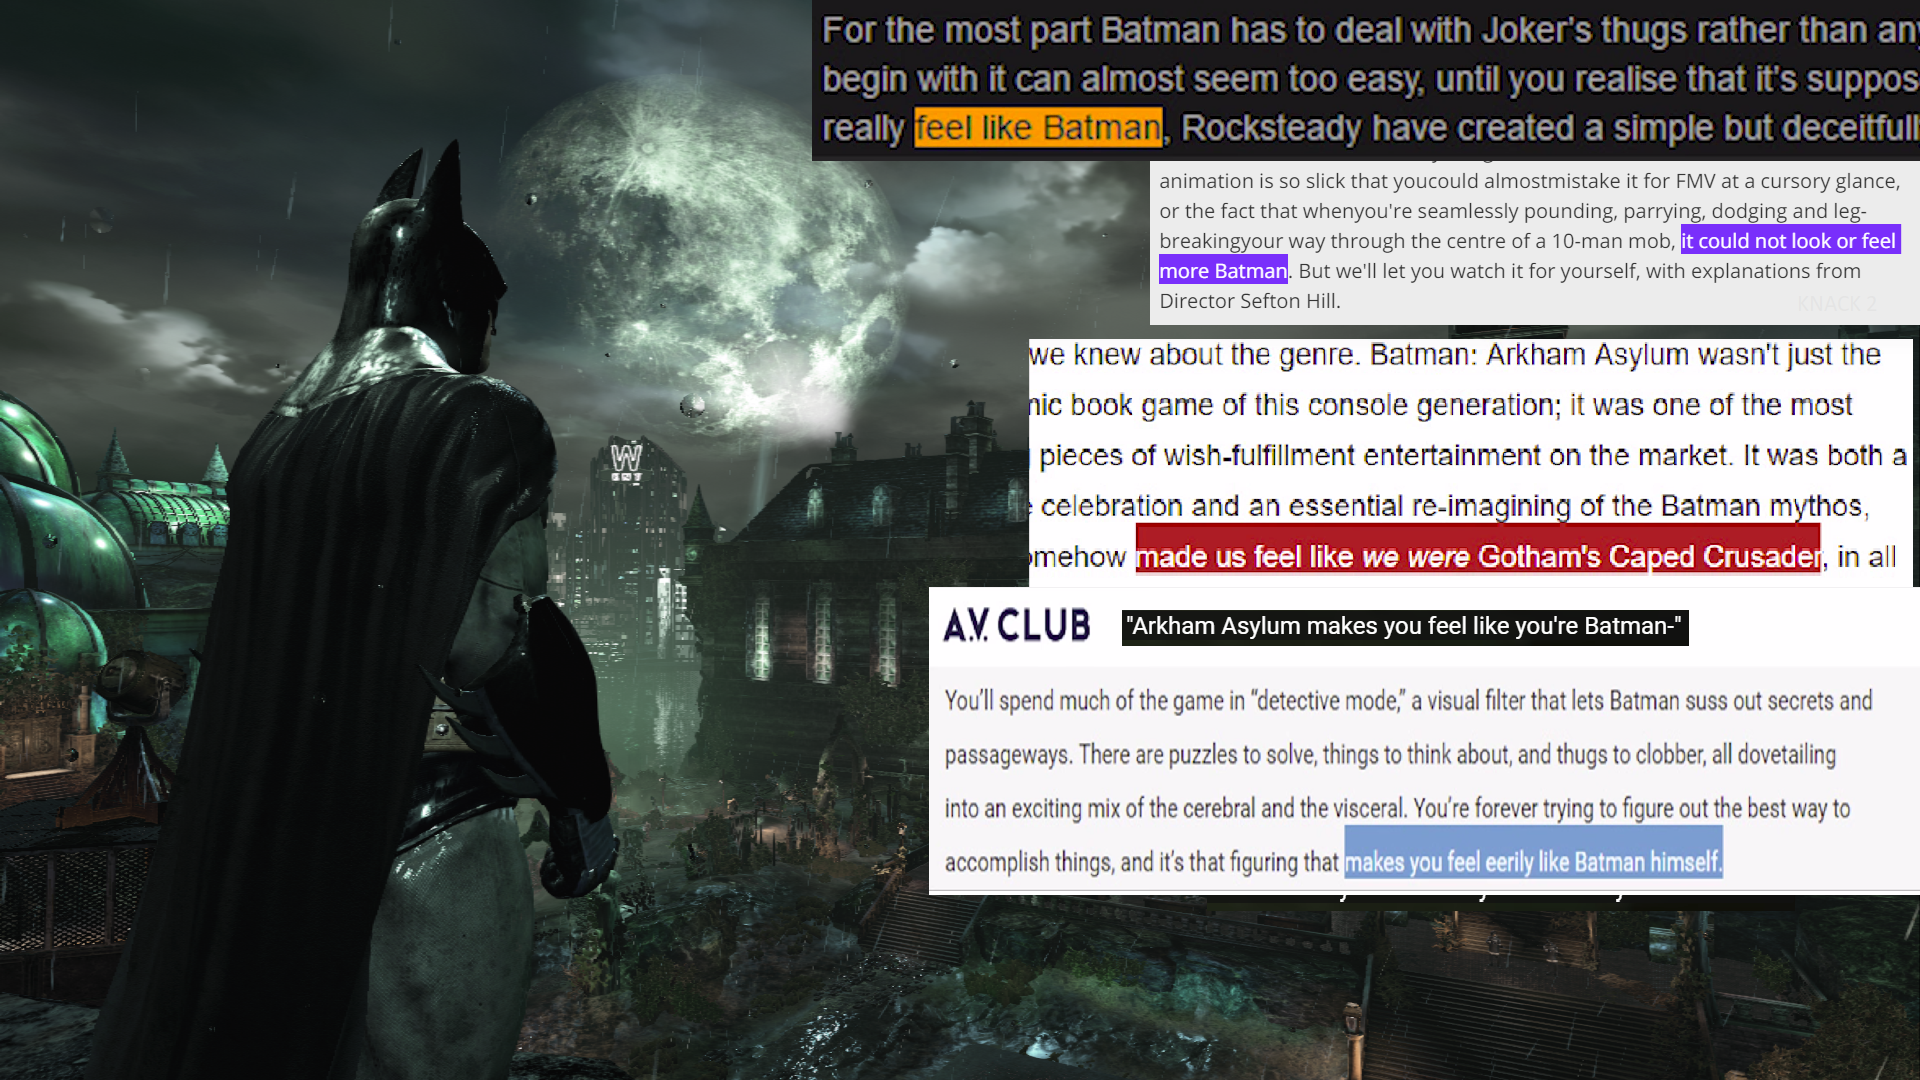

### Project Summary:

Game Reviews have slowly evolved to sound more and more monotonous over time. Unfortunately, many of these reviews say the same, and it isn’t easy to distinguish one thought from another. This project will use NLP techniques and visualizations to explore the similarity of reviews from the 2009 video game "Batman: Arkham Asylum.”. 

This is one of two notebooks, this focuses on scraping and cleaning review data from the first 10 pages of Google.

Note: I revisited this project in 2023 to clean up some of the script for my portfolio: a previous iteration can still be found on my GIT.


### Research Questions to be Answered:

1. How similar are the reviews?

2. Which reviews are the most/least similar?


## 0.  Basic Imports and Setup

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Turning off pesky error message that happens when you attempt to write over a row in Pandas
pd.options.mode.chained_assignment = None

## 1.  Retrieving URLs from First 10 pages of Google Search

In [3]:
# Creating a dictionary of google search pages and their respective URL

from bs4 import BeautifulSoup

page_list = []
google_url_list = []

for i in range(1, 11):

    page_list.append("page{}".format(i))

    i = "http://www.google.com/search?q=arkham+asylum+review&start=" + \
        str((i - 1)*10)

    google_url_list.append(i)

first_10_dict = dict(zip(page_list, google_url_list))

print("First 10 Pages of Google Search:")
print("\n")
print(first_10_dict)

First 10 Pages of Google Search:


{'page1': 'http://www.google.com/search?q=arkham+asylum+review&start=0', 'page2': 'http://www.google.com/search?q=arkham+asylum+review&start=10', 'page3': 'http://www.google.com/search?q=arkham+asylum+review&start=20', 'page4': 'http://www.google.com/search?q=arkham+asylum+review&start=30', 'page5': 'http://www.google.com/search?q=arkham+asylum+review&start=40', 'page6': 'http://www.google.com/search?q=arkham+asylum+review&start=50', 'page7': 'http://www.google.com/search?q=arkham+asylum+review&start=60', 'page8': 'http://www.google.com/search?q=arkham+asylum+review&start=70', 'page9': 'http://www.google.com/search?q=arkham+asylum+review&start=80', 'page10': 'http://www.google.com/search?q=arkham+asylum+review&start=90'}


In [4]:
import requests
import re

# Scrape all the links off the first 10 pages using Beautiful Soup

all_links = []

for url in google_url_list:

    r = requests.get(url)

    page = r.text

    soup = BeautifulSoup(page, "html.parser")

    for link in soup.find_all("a", href=re.compile("(?<=/url\?q=)(htt.*://.*)")):
        all_links.append(
            re.split(":(?=http)", link["href"].replace("/url?q=", "")))

    print("{}: Good to go!".format(r))
    # Looking for "<Response of [200]>" to show that the request for each page went through successfully.

<Response [200]>: Good to go!
<Response [200]>: Good to go!
<Response [200]>: Good to go!
<Response [200]>: Good to go!
<Response [200]>: Good to go!
<Response [200]>: Good to go!
<Response [200]>: Good to go!
<Response [200]>: Good to go!
<Response [200]>: Good to go!
<Response [200]>: Good to go!


In [5]:
# Creating a dataframe with newly scraped links
google_links = pd.DataFrame(data=all_links, columns=["review_link"])

In [6]:
google_links.head(10)

,review_link
0,https://www.ign.com/articles/2010/05/27/batman...
1,https://www.ign.com/articles/2009/09/11/batman...
2,https://www.youtube.com/watch%3Fv%3DzjrszD19gz...
3,https://www.youtube.com/watch%3Fv%3DzjrszD19gz...
4,https://en.wikipedia.org/wiki/Batman:_Arkham_A...
5,https://www.youtube.com/watch%3Fv%3DosKiTFgm2a...
6,https://www.youtube.com/watch%3Fv%3DosKiTFgm2a...
7,https://www.gamespot.com/reviews/batman-arkham...
8,https://www.destructoid.com/review-batman-arkh...
9,https://gameblur.net/editorial/batman-arkham-a...


In [7]:
# Amount of Links we have so far
google_links["review_link"].describe()

count                                                   123
unique                                                  123
top       https://www.ign.com/articles/2010/05/27/batman...
freq                                                      1
Name: review_link, dtype: object

In [8]:
google_links["review_link"].sample(5)

91    https://eip.gg/reviews/batman-arkham-asylum-it...
53    https://www.goodreads.com/book/show/22374.Batm...
36    http://ps3.gamespy.com/playstation-3/batman-ar...
94    https://www.techspot.com/products/pc-games/bat...
8     https://www.destructoid.com/review-batman-arkh...
Name: review_link, dtype: object

In [9]:
# I discovered that the links had many characters on the end that would prove troublesome later
# The line of code below removes them
google_links["review_link"] = google_links["review_link"].apply(
    lambda x: x.split("&")[0])

## 2.   Extracting Website Content Using Diffbot

Since the HTML on various websites is heterogeneous and formatted differently, I needed a solution to extract article content without writing unique code for eachwebsite.

I tried various ways to extract the proper content I needed from each review (requests, bs4, Selenium, Justext, Goose, etc). After a lot of trial and error, I found Diffbot worked the best for this project.

If you wish to use this code yourself, you can sign up for a free 2-week trial without inserting your credit card information.

Note: This API has been replaced with the current code needed to be compatible with Diffbot, as the Diffbot API in Python has been depreciated.

Link to Diffbot-->https://www.diffbot.com/

In [10]:
# Inputting token information

from getpass import getpass

token = getpass()

········


In [11]:
# Using quote_plus to encode URL for Diffbot API
from urllib.parse import quote_plus

google_links["review_link_encoded"] = google_links["review_link"] .apply(
    lambda x: quote_plus(x))

google_links["review_link_encoded"].head(3)

0    https%3A%2F%2Fwww.ign.com%2Farticles%2F2010%2F...
1    https%3A%2F%2Fwww.ign.com%2Farticles%2F2009%2F...
2    https%3A%2F%2Fwww.youtube.com%2Fwatch%253Fv%25...
Name: review_link_encoded, dtype: object

In [12]:
def diffbot_crawler(token, encoded_article):
    '''
    Access Diffbot API
    '''

    try:
        url = f"https://api.diffbot.com/v3/article?token={token}&url={encoded_article}"
        headers = {"accept": "application/json"}
        response = requests.get(url, headers=headers)
        return response.text
    except:
        return 'Error'

In [13]:
%time

google_links["review_json"] = google_links["review_link_encoded"].apply(
    lambda x: diffbot_crawler(token, x))

Wall time: 0 ns


In [14]:
def json_converter(val):
    '''
    Function to convert string to JSON object
    '''
    try:
        return json.loads(val)
    except (ValueError, SyntaxError) as e:
        return val


google_links["review_json"] = google_links["review_json"].apply(
    lambda x: json_converter(x))

In [15]:
# Putting all JSON in a list
all_json = google_links["review_json"].tolist()

In [16]:
# Count how many times Diffbot successfully pulled article information

article_objects = [x for x in all_json if type(
    x) == dict and next(iter(x.keys())) != "errorCode"]

error_objects = [x for x in all_json if type(
    x) == dict and next(iter(x.keys())) == "errorCode"]

print("Total number of articles successfully extracted using Diffbot:  {}".format(
    len(article_objects)))
print("Total number of articles unsuccessfully extracted using Diffbot:  {}".format(
    len(error_objects)))

Total number of articles successfully extracted using Diffbot:  95
Total number of articles unsuccessfully extracted using Diffbot:  28


In [17]:
article_url = []
article_titles = []
article_author = []
article_postdate = []
article_text = []
article_sitename = []
article_estimated_postdate = []


for i in range(0, len(article_objects)):

    article_url.append(article_objects[i]["request"]["pageUrl"])

    article_titles.append(article_objects[i]["objects"][0]["title"])

    article_text.append(article_objects[i]["objects"][0]["text"])

    article_sitename.append(article_objects[i]["objects"][0]["siteName"])

    try:

        article_estimated_postdate.append(
            article_objects[i]["objects"][0]["estimatedDate"])

    except KeyError:

        article_estimated_postdate.append(np.NaN)

    try:
        article_author.append(article_objects[i]["objects"][0]["author"])

    except KeyError:

        article_author.append(np.NaN)


print("Length of review_postdate: {}".format(len(article_estimated_postdate)))

print("\n")

print("Length of review_author: {}".format(len(article_estimated_postdate)))

Length of review_postdate: 95


Length of review_author: 95


In [18]:
# Concatenating lists into a dataframe

review_data = pd.DataFrame(data=list(zip(article_url, article_sitename, article_titles,
                                         article_author, article_estimated_postdate, article_text)),
                           columns=["review_link", "site_name", "review_title",
                                    "review_author", "review_postdate", "review_text"])

review_data.head()

,review_link,site_name,review_title,review_author,review_postdate,review_text
0,https://en.wikipedia.org/wiki/Batman:_Arkham_A...,wikipedia.org,Batman: Arkham Asylum,NaN,"Tue, 12 Aug 2008 20:11:16 GMT","2009 video game\nFor other uses, see Arkham As..."
1,https://www.gamespot.com/reviews/batman-arkham...,GameSpot,Batman: Arkham Asylum Review,Justin Calvert,"Tue, 25 Aug 2009 00:00:00 GMT","You've heard of Batman no doubt, but if you do..."
2,https://www.destructoid.com/review-batman-arkh...,Destructoid,Review: Batman: Arkham Asylum,Destructoid Staff,"Thu, 27 Aug 2009 22:00:00 GMT",Finding a licensed superhero game which stays ...
3,https://gameblur.net/editorial/batman-arkham-a...,gameblur,Batman: Arkham Asylum Retrospective,Andrew Logue,"Thu, 17 Nov 2022 13:03:52 GMT",I had little enthusiasm left for Gotham Knight...
4,https://www.commonsensemedia.org/game-reviews/...,Common Sense Media,Batman: Arkham Asylum,NaN,"Sun, 23 Aug 2009 00:00:00 GMT",Add your rating\nThis is one of the best games...


In [19]:
# Creating final datafram
reviews = pd.merge(google_links, review_data, on="review_link", how="left")

# Removing rows where we don't have the review text
reviews = reviews[reviews['review_text'].isnull() == False]

# Removing rows where we could'nt scrape the link from google
reviews = reviews[~reviews['review_link'].str.contains('support.google.com')]

reviews.reset_index(drop = True,inplace = True)

## 3.  Additional Cleaning for Text Processing and Visualizations

In [20]:
reviews.head(3)

,review_link,review_link_encoded,review_json,site_name,review_title,review_author,review_postdate,review_text
0,https://en.wikipedia.org/wiki/Batman:_Arkham_A...,https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FBatman...,{'request': {'pageUrl': 'https://en.wikipedia....,wikipedia.org,Batman: Arkham Asylum,NaN,"Tue, 12 Aug 2008 20:11:16 GMT","2009 video game\nFor other uses, see Arkham As..."
1,https://www.gamespot.com/reviews/batman-arkham...,https%3A%2F%2Fwww.gamespot.com%2Freviews%2Fbat...,{'request': {'pageUrl': 'https://www.gamespot....,GameSpot,Batman: Arkham Asylum Review,Justin Calvert,"Tue, 25 Aug 2009 00:00:00 GMT","You've heard of Batman no doubt, but if you do..."
2,https://www.destructoid.com/review-batman-arkh...,https%3A%2F%2Fwww.destructoid.com%2Freview-bat...,{'request': {'pageUrl': 'https://www.destructo...,Destructoid,Review: Batman: Arkham Asylum,Destructoid Staff,"Thu, 27 Aug 2009 22:00:00 GMT",Finding a licensed superhero game which stays ...


In [21]:
# Removing the new line syntax from each string
reviews["review_text"] = reviews["review_text"].apply(
    lambda x: x.replace("\n", " "))

In [22]:
# Eliminating contractions in review text
import contractions

reviews["review_text"] = reviews["review_text"].apply(
    lambda x: contractions.fix(x))

In [23]:
def character_remover(x):
    '''
    Removing special characters
    '''
    
    pattern = r'[^a-zA-z0-9\s]'
    
    text = re.sub(pattern, '', x)
    
    return x

reviews["review_text"] = reviews["review_text"].apply(character_remover)

In [24]:
# Converting date into a datetime object
reviews["review_postdate"] = pd.to_datetime(reviews["review_postdate"], format="%a, %d %b %Y %X %Z",errors = 'coerce')

In [25]:
#Creating column with the length of the reviews
reviews["review_length"] = reviews["review_text"].apply(lambda x: x.split()).apply(len)

In [26]:
#Average review length is about 1500 words, with one review being 21k+ words
print(reviews.info())
reviews["review_length"].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   review_link          105 non-null    object             
 1   review_link_encoded  105 non-null    object             
 2   review_json          105 non-null    object             
 3   site_name            105 non-null    object             
 4   review_title         105 non-null    object             
 5   review_author        71 non-null     object             
 6   review_postdate      93 non-null     datetime64[ns, GMT]
 7   review_text          105 non-null    object             
 8   review_length        105 non-null    int64              
dtypes: datetime64[ns, GMT](1), int64(1), object(7)
memory usage: 7.5+ KB
None


count      105.000000
mean      1517.161905
std       2289.159163
min          0.000000
25%        603.000000
50%        885.000000
75%       2024.000000
max      21926.000000
Name: review_length, dtype: float64

In [27]:
reviews['review_postdate'] = reviews['review_postdate'].dt.tz_localize(None)

reviews.to_excel('arkham_asylum_review_data.xlsx',index=False)

We now have a DataFrame with all our review data; in the next notebook, we will be diving into the data and start NLP modeling.